In [1]:
import os, json
from pprint import pprint

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from src import ROWS, COLS, BOARD_SIZE, SHIP_LENS
from src.placements import *
from src.strategy import *
from src.game import Game, Simulation
from src.board import Board, SquareState

In [4]:
%matplotlib inline

In [5]:
SIM_SECONDS = 60

## Placement Strategies

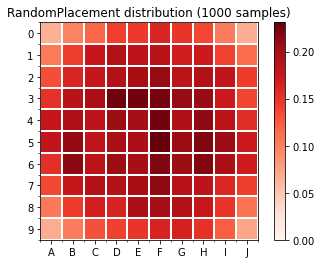

In [5]:
# probability of finding a ship in a given square with RandomPlacement
RandomPlacement().show_distribution(1000)

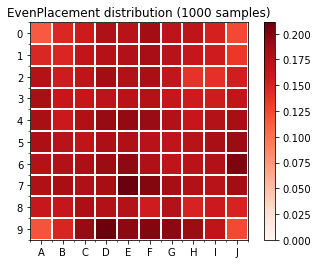

In [6]:
# probability of finding a ship in a given square with RandomPlacement
EvenPlacement().show_distribution(1000)

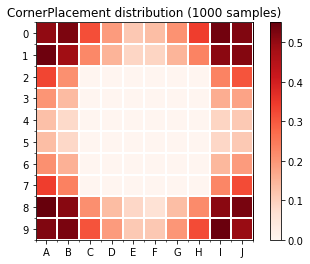

In [7]:
# probability of finding a ship in a given square with RandomPlacement
CornerPlacement().show_distribution(1000)

## Shooting Strategies vs. Random Placement

In [8]:
# simulate random strategy against random placement
sim = Simulation(RandomStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of RandomStrategy and RandomPlacement in 8 processes
{'avg_turns': 95.58752911664577,
 'median_turns': 97.0,
 'n_simulations': 11162,
 'std_dev_turns': 4.538779372414622,
 'time': {'cumulative_sec': {'init': 263.5634970040992,
                             'play': 216.34591472521424,
                             'total': 480.0812079515308},
          'per_game_sec': {'init': 0.02361256916359964,
                           'play': 0.019382361111379164,
                           'total': 0.043010321443426876},
          'per_turn_ms': 0.20277081425262922},
 'total_turns': 1066948}


In [9]:
# simulate elimination strategy against random placement
sim = Simulation(EliminationStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of EliminationStrategy and RandomPlacement in 8 processes
{'avg_turns': 61.45889792231256,
 'median_turns': 60.0,
 'n_simulations': 2214,
 'std_dev_turns': 8.435304559591613,
 'time': {'cumulative_sec': {'init': 310.54984153597616,
                             'play': 170.54706935258582,
                             'total': 481.13383269426413},
          'per_game_sec': {'init': 0.14026641442456014,
                           'play': 0.07703119663621763,
                           'total': 0.21731428757645174},
          'per_turn_ms': 1.253377448023707},
 'total_turns': 136070}


In [7]:
# simulate random strategy against random placement
sim = Simulation(SearchHuntStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of SearchHuntStrategy and RandomPlacement in 8 processes
{'avg_turns': 45.86983099604459,
 'median_turns': 45.0,
 'n_simulations': 2781,
 'std_dev_turns': 9.228703071470127,
 'time': {'cumulative_sec': {'init': 340.37742922082543,
                             'play': 139.7798380528111,
                             'total': 480.2074330758769},
          'per_game_sec': {'init': 0.12239389759828315,
                           'play': 0.05026243727177673,
                           'total': 0.17267437363390037},
          'per_turn_ms': 1.0957624255496152},
 'total_turns': 127564}


In [6]:
sim = Simulation(CSPStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of CSPStrategy and RandomPlacement in 8 processes
{'avg_turns': 61.45,
 'median_turns': 61.0,
 'n_simulations': 80,
 'std_dev_turns': 9.201766134824336,
 'time': {'cumulative_sec': {'init': 5.968017507810146,
                             'play': 913.8615533916745,
                             'total': 919.8308885521255},
          'per_game_sec': {'init': 0.07460021884762683,
                           'play': 11.423269417395932,
                           'total': 11.49788610690157},
          'per_turn_ms': 185.89535260204934},
 'total_turns': 4916}


In [6]:
sim = Simulation(GreedyNNStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedyNNStrategy and RandomPlacement in 8 processes


2022-03-15 22:14:55.858439: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 22:14:55.858423: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 22:14:55.858422: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

{'avg_turns': 54.2875,
 'median_turns': 52.0,
 'n_simulations': 80,
 'std_dev_turns': 12.018936881022382,
 'time': {'cumulative_sec': {'init': 217.70793219911866,
                             'play': 651.2661244873889,
                             'total': 868.9759653520305},
          'per_game_sec': {'init': 2.7213491524889832,
                           'play': 8.14082655609236,
                           'total': 10.862199566900381},
          'per_turn_ms': 149.95766163651598},
 'total_turns': 4343}


In [7]:
sim = Simulation(GreedySamplingStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedySamplingStrategy and RandomPlacement in 8 processes
{'avg_turns': 47.8375,
 'median_turns': 47.0,
 'n_simulations': 80,
 'std_dev_turns': 10.390432798974256,
 'time': {'cumulative_sec': {'init': 11.527172753820196,
                             'play': 965.8386546457186,
                             'total': 977.36697285017},
          'per_game_sec': {'init': 0.14408965942275245,
                           'play': 12.072983183071482,
                           'total': 12.217087160627125},
          'per_turn_ms': 252.37487709582408},
 'total_turns': 3827}


In [8]:
sim = Simulation(EntropyStrategy(), RandomPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of EntropyStrategy and RandomPlacement in 8 processes
{'avg_turns': 50.7125,
 'median_turns': 48.5,
 'n_simulations': 80,
 'std_dev_turns': 9.295420579511182,
 'time': {'cumulative_sec': {'init': 16.877804923104122,
                             'play': 8913.544301938266,
                             'total': 8930.437477988424},
          'per_game_sec': {'init': 0.21097256153880153,
                           'play': 111.41930377422833,
                           'total': 111.63046847485529},
          'per_turn_ms': 2197.0777180030236},
 'total_turns': 4057}


## Shooting Strategies vs. Other Placements

Even Placement

In [7]:
sim = Simulation(SearchHuntStrategy(), EvenPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of SearchHuntStrategy and EvenPlacement in 8 processes
{'avg_turns': 46.650501002004006,
 'median_turns': 46.0,
 'n_simulations': 2495,
 'std_dev_turns': 9.467405043940555,
 'time': {'cumulative_sec': {'init': 338.99627276393585,
                             'play': 141.62244310206734,
                             'total': 480.6643998527434},
          'per_game_sec': {'init': 0.13587024960478392,
                           'play': 0.05676250224531757,
                           'total': 0.1926510620652278},
          'per_turn_ms': 1.216760828418095},
 'total_turns': 116393}


In [8]:
sim = Simulation(GreedyNNStrategy(), EvenPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedyNNStrategy and EvenPlacement in 8 processes


2022-03-15 23:38:41.235289: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 23:38:41.235287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 23:38:41.235283: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

{'avg_turns': 55.675,
 'median_turns': 53.0,
 'n_simulations': 80,
 'std_dev_turns': 12.6538284720475,
 'time': {'cumulative_sec': {'init': 191.17947600153275,
                             'play': 524.796192413196,
                             'total': 715.9770421092398},
          'per_game_sec': {'init': 2.3897434500191594,
                           'play': 6.55995240516495,
                           'total': 8.949713026365497},
          'per_turn_ms': 117.82581778473192},
 'total_turns': 4454}


In [9]:
sim = Simulation(GreedySamplingStrategy(), EvenPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedySamplingStrategy and EvenPlacement in 8 processes
{'avg_turns': 48.5,
 'median_turns': 47.5,
 'n_simulations': 80,
 'std_dev_turns': 10.385085459446158,
 'time': {'cumulative_sec': {'init': 13.521057513542473,
                             'play': 992.4420577907003,
                             'total': 1005.9645346060861},
          'per_game_sec': {'init': 0.16901321891928092,
                           'play': 12.405525722383754,
                           'total': 12.574556682576077},
          'per_turn_ms': 255.7840355130671},
 'total_turns': 3880}


Corner Placement

In [10]:
sim = Simulation(SearchHuntStrategy(), CornerPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of SearchHuntStrategy and CornerPlacement in 8 processes
{'avg_turns': 49.85866050808314,
 'median_turns': 50.0,
 'n_simulations': 2165,
 'std_dev_turns': 8.169643299855261,
 'time': {'cumulative_sec': {'init': 316.54336790763773,
                             'play': 164.31288627837785,
                             'total': 480.8907491010614},
          'per_game_sec': {'init': 0.14620940780953243,
                           'play': 0.07589509758816529,
                           'total': 0.22212043838386206},
          'per_turn_ms': 1.5222049051209687},
 'total_turns': 107944}


In [11]:
sim = Simulation(GreedyNNStrategy(), CornerPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedyNNStrategy and CornerPlacement in 8 processes


2022-03-15 23:44:34.420323: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 23:44:34.420345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-15 23:44:34.420372: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

{'avg_turns': 57.85,
 'median_turns': 56.0,
 'n_simulations': 80,
 'std_dev_turns': 10.137923850572168,
 'time': {'cumulative_sec': {'init': 224.47280496289022,
                             'play': 670.547066693427,
                             'total': 895.0219959910028},
          'per_game_sec': {'init': 2.8059100620361277,
                           'play': 8.381838333667838,
                           'total': 11.187774949887535},
          'per_turn_ms': 144.88916739270246},
 'total_turns': 4628}


In [12]:
sim = Simulation(GreedySamplingStrategy(), CornerPlacement()).run(max_secs=SIM_SECONDS, min_sims=80)
pprint(sim.metrics())

Simulating 60 (ish) seconds of GreedySamplingStrategy and CornerPlacement in 8 processes
{'avg_turns': 53.9,
 'median_turns': 54.0,
 'n_simulations': 80,
 'std_dev_turns': 10.240361321750322,
 'time': {'cumulative_sec': {'init': 13.200720064342022,
                             'play': 1243.5157890473492,
                             'total': 1256.7177713762503},
          'per_game_sec': {'init': 0.16500900080427527,
                           'play': 15.543947363091865,
                           'total': 15.708972142203129},
          'per_turn_ms': 288.3849232484576},
 'total_turns': 4312}


## Visualizations

To visualize any method, construct a Simulation similar to the following and use the `display_one` method (with an `interval` between frames in ms, and `ipynb=True`)

In [9]:
sim = Simulation(SearchHuntStrategy(), RandomPlacement())
sim.display_one(interval=100, ipynb=True)